


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

<i style="color:darkblue;">Para a visão geral dos dados da Instacart, iniciar importando pandas para carregar os cinco CSV. Em seguida, fazer uma verificação preliminar dos DataFrames afim de entender a estrutura, tipos de dados e entre outras informações. Identificar inconsistências, como valores ausentes e linhas duplicadas e elaborar um plano para tratar essas inconsistências. Visualizar distribuição dos pedidos e frequência de compras. Concluir com um resumo das descobertas e deixar tudo preparado para o pré-processamento e análise exploratória de dados.</i>

In [1]:
# Importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# leia os conjuntos de dados em DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

products = pd.read_csv('/datasets/products.csv', sep=';')

aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

departments = pd.read_csv('/datasets/departments.csv', sep=';')

order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# imprima as informações sobre o DataFrame
print('Informações sobre o DataFrame "orders":')
print()
print(orders.info())

Informações sobre o DataFrame "orders":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# imprima as informações sobre o DataFrame
print('Informações sobre o DataFrame "products":')
print()
print(products.info())
print()

products['product_id'] = pd.to_numeric(products['product_id'], errors='coerce')
print(products.info())

Informações sobre o DataFrame "products":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
# imprima as informações sobre o DataFrame
print('Informações sobre o DataFrame "aisles":')
print()
print(aisles.info())

Informações sobre o DataFrame "aisles":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# imprima as informações sobre o DataFrame
print('Informações sobre o DataFrame "departments":')
print()
print(departments.info())

Informações sobre o DataFrame "departments":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# imprima as informações sobre o DataFrame
print('Informações sobre o DataFrame "order_products":')
print()
print(order_products.info())

Informações sobre o DataFrame "order_products":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

<i style="color:darkblue;">Nesta primeira Etapa, é analisado o conjunto de dados da <b>Instacart</b>. Valores ausentes em `days_since_prior_order` e `product_name` foram identificados, indicando a necessidade de tratamento. Os tipos de dados parecem adequados, mas ajustes podem ser feitos, como converter `days_since_prior_order` para `int64`. Também verificou-se a necessidade de converter `'product_id'` do DataFrame `product` para numérico, pois o mesmo estava em tipo `object`. Os dados estão preparados para análise exploratória, planejando tratar valores ausentes e explorar relações entre tabelas. Questões analíticas surgem, incluindo padrões de pedidos ao longo do tempo e a influência de dias desde o último pedido na reordenação. Há a necessidade de abordagem cuidadosa na próxima etapa para insights mais profundos e modelagem eficaz.</i>

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

<i style="color:darkblue;">Nesta etapa, o plano é realizar correções nos tipos de dados, tratamento de valores ausentes e remoção de duplicatas. Garantir que as colunas de ID sejam inteiras, considerando a conversão da coluna `'days_since_prior_order'` para inteiro. Para valores ausentes, preencher a coluna `'days_since_prior_order'` em `orders` com a média ou zero, dependendo do contexto. Em `products`, examinar os valores nulos em `'product_name'` e decidir se serão removidas as linhas ou se preencher de maneira apropriada. Quanto às duplicatas, concentrar em `order_products`, garantindo que a remoção seja feita sem prejudicar análises subsequentes. Todas as escolhas metodológicas serão justificadas com base na natureza dos dados e nos objetivos analíticos, buscando preparar os dados para análises mais aprofundadas e modelos futuros. O foco é garantir consistência e confiabilidade nos dados, mantendo a integridade e relevância para o projeto.</i>

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
# Verificar se há pedidos duplicados
duplicates_orders = orders[orders.duplicated()]

print(duplicates_orders)
print(f'Número de linhas duplicadas: {len(duplicates_orders)}')

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?

<i style="color:darkblue;">Foram identificadas 15 linhas duplicadas no DataFrame `orders`, evidenciando entradas idênticas em todas as linhas. Essas duplicatas podem indicar registros incorretos ou repetições indevidas. A decisão de remoção ou manutenção dessas duplicatas depende do contexto específico; se refletirem entradas errôneas, a remoção é apropriada. O processo de remoção será realizado usando `.drop_duplicates()`. Essa abordagem visa garantir que análises subsequentes se baseiem em dados confiáveis e únicos, mantendo a integridade do conjunto de dados da <b>Instacart</b>.</i>

In [9]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

wednesday_2h = orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)]

print(wednesday_2h)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

O que esse resultado quer dizer?

<i style="color:darkblue;">A variável `wednesday_2h` exibe 136 pedidos feitos às 2h da manhã nas quartas-feiras. Esses dados possibilitam análises mais aprofundadas sobre padrões de pedidos específicos, comportamento dos usuários nesse horário e demandas específicas durante as quartas-feiras. A identificação desses pedidos proporciona percepções valiosas para otimizar estratégias de atendimento e entender melhor o comportamento dos clientes em determinados momentos do dia.</i>

In [10]:
# Remova pedidos duplicados
orders.drop_duplicates(inplace=True)
orders.reset_index(drop=True, inplace=True)

print(f'Quantidade de linhas após a remoção de duplicatas: {len(orders)}')

Quantidade de linhas após a remoção de duplicatas: 478952


In [11]:
# Verifique as linhas duplicadas mais uma vez
duplicates_after_removal = orders[orders.duplicated()]

print(f'Verificação de linhas duplicatas: {len(duplicates_after_removal)}')

Verificação de linhas duplicatas: 0


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados
duplicated_order_ids = duplicates_after_removal['order_id'].unique()

print(f'IDs de pedidos duplicados: {len(duplicated_order_ids)}')

IDs de pedidos duplicados: 0




Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">Após a remoção de pedidos duplicados no DataFrame `orders`, a quantidade de linhas foi reduzida de 478.966 para 478.952, indicando uma eliminação efetiva de duplicatas. A verificação subsequente confirmou a ausência de linhas duplicadas no conjunto de dados. Essa limpeza é crucial para garantir a integridade dos dados, proporcionando uma base sólida para análises mais aprofundadas.</i>

### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas
duplicated_products = products.duplicated()

print(f'Total de linhas duplicadas: {duplicated_products.sum()}')

Total de linhas duplicadas: 0


In [14]:
# Verifique apenas se há IDs de departamentos duplicados
duplicated_department_ids = products['department_id'].duplicated()

print(f'Total de IDs de departamento duplicados: {duplicated_department_ids.sum()}')

Total de IDs de departamento duplicados: 49673


In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
duplicated_product_names = products['product_name'].str.lower().duplicated().sum()

print(f'Total de nomes de produtos duplicados: {duplicated_product_names}')

Total de nomes de produtos duplicados: 1361


In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando
products_not_missing = products.dropna(subset=['product_name'])
duplicated_product_names_not_missing = products_not_missing['product_name'].str.lower().duplicated().sum()

print(f'Total de nomes de produtos duplicados (não faltando): {duplicated_product_names_not_missing}')

Total de nomes de produtos duplicados (não faltando): 104


Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">A análise do DataFrame `products` revelou que não existem linhas completamente duplicadas, o que é um bom indicativo da qualidade dos dados nesse aspecto. No entanto, foram identificados 49.673 IDs de departamento duplicados, um resultado esperado dado que vários produtos podem pertencer ao mesmo departamento, indicando que essa duplicação não é um problema. Por outro lado, a análise mostrou 1.361 nomes de produtos duplicados ao considerar todos os nomes em minúsculas, sugerindo a existência de possíveis duplicatas que podem ter sido inseridos de forma ligeiramente diferente. Ao filtrar apenas os registros com nomes de produtos não faltantes, o número de duplicatas reduziu para 104, indicando que parte das duplicatas identificadas pode estar relacionada a registros incompletos ou a inconsistências nos dados. As conclusões apontam para a necessidade de uma revisão cuidadosa dos nomes de produtos duplicados para entender se representam o mesmo produto ou se são entradas distintas.</i>

### DataFrame `departments`

In [17]:
# Verifique se há linhas completamente duplicadas
duplicated_departments = departments.duplicated()

print(f"Total de linhas duplicadas em DataFrame departments: {duplicated_departments.sum()}")

Total de linhas duplicadas em DataFrame departments: 0


In [18]:
# Verifique apenas se há IDs dos produtos duplicados
duplicated_department_ids = departments['department_id'].duplicated()

print(f'Total de IDs de departamento duplicados: {duplicated_department_ids.sum()}')

Total de IDs de departamento duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">A análise do DataFrame `departments` mostrou ausência de duplicatas tanto em linhas inteiras quanto em IDs de departamento, indicando alta integridade e unicidade dos dados. Esse resultado é essencial para garantir a confiabilidade das informações, facilitando análises futuras e a gestão eficiente de categorias de produtos. Dessa forma, não há necessidade de ações corretivas para tratar duplicatas neste DataFrame.</i>

### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas
duplicated_aisles = aisles.duplicated()
print(f'Total de linhas duplicadas em DataFrame aisles: {duplicated_aisles.sum()}')

Total de linhas duplicadas em DataFrame aisles: 0


In [20]:
# Verifique apenas se há IDs dos produtos duplicados
duplicated_aisle_ids = aisles['aisle_id'].duplicated()
print(f'Total de IDs de aisle duplicados: {duplicated_aisle_ids.sum()}')

Total de IDs de aisle duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">A análise do DataFrame `aisles` demonstrou a inexistência de linhas ou IDs duplicados, indicando alta integridade e unicidade nos dados das seções do supermercado. Essa qualidade dos dados é crucial para assegurar confiabilidade em análises futuras, indicando eficácia nos procedimentos de inserção e manutenção. A ausência de duplicatas fortalece a confiança na utilização desses dados para tomada de decisões e estratégias operacionais.</i>


### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas
duplicated_order_products = order_products.duplicated()
print(f'Total de linhas duplicadas em DataFrame order_products: {duplicated_order_products.sum()}')

Total de linhas duplicadas em DataFrame order_products: 0


In [22]:
# Verifique mais uma vez se há outros casos complicados de duplicados
complicated_duplicates = order_products[order_products.duplicated(keep=False)]
print(f'Total de linhas duplicadas em DataFrame order_products: {complicated_duplicates.sum()}')

Total de linhas duplicadas em DataFrame order_products: order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">A análise do DataFrame `order_products` revelou a ausência de linhas completamente duplicadas, indicando dados bem estruturados e consistentes. Ao verificar casos complicados de duplicatas, não foram encontrados registros com duplicações, reforçando a qualidade e a integridade dos dados relacionados aos produtos incluídos nos pedidos. Esses resultados positivos indicam que não são necessárias ações corretivas para duplicatas neste DataFrame.</i>

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'
null_product_names = products['product_name'].isnull().sum()
print(f'Total de valores ausentes na coluna "product_name" de DataFrame products: {null_product_names}')

Total de valores ausentes na coluna "product_name" de DataFrame products: 1258


Descreva brevemente suas conclusões.

<i style="color:darkblue;">A análise revelou que o DataFrame `products` contém um total de 1.258 valores ausentes na coluna `'product_name'`. Esta quantidade significativa de informações faltantes pode impactar análises que dependam da identificação precisa dos produtos, podendo dificultar a associação correta dos itens às suas respectivas categorias ou departamentos. É essencial abordar esses valores ausentes, seja preenchendo-os com um marcador genérico, como `'Unknown'`, para manter a integridade dos dados, ou investigando mais a fundo para tentar recuperar os nomes ausentes, consultando outras fontes de dados.</i>

In [24]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
null_products_section = products[products['product_name'].isnull() & (products['aisle_id'] == 100)]
print(f'Produtos com nomes ausentes na seção 100: {len(null_products_section)}')

Produtos com nomes ausentes na seção 100: 1258


Descreva brevemente suas conclusões.

<i style="color:darkblue;">Ao analisar os produtos com nomes ausentes no DataFrame `products`, foi identificado que todos os 1.258 registros sem nome estão associados à seção de ID 100. Essa concentração sugere que há uma peculiaridade nessa seção que pode estar relacionada à falta de informações. A investigação aprofundada na seção 100 pode revelar sobre por que esses produtos específicos não possuem nomes registrados. Essa análise mais detalhada permitirá melhorias nos processos de coleta e manutenção de dados, visando evitar futuras omissões.</i>

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
null_products_department = products[products['product_name'].isnull() & (products['department_id'] == 21)]
print(f'Produtos com nomes ausentes no departamento 21: {len(null_products_department)}')

Produtos com nomes ausentes no departamento 21: 1258


Descreva brevemente suas conclusões.

<i style="color:darkblue;">Ao analisar os produtos com nomes ausentes no DataFrame `products`, observa-se que 1.258 registros sem nome estão associados ao departamento de ID 21. Essa concentração sugere que a ausência de informações é específica para esse departamento, como ocorrido na seção de ID 100. Investigar detalhadamente o departamento 21 pode revelar razões específicas para a falta de nomes de produtos.</i>

In [26]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
section_100_info = aisles[aisles['aisle_id'] == 100]
department_21_info = departments[departments['department_id'] == 21]

print(f'Informações sobre a seção de ID 100:\n{section_100_info}')
print()
print(f'Informações sobre o departamento de ID 21:\n{department_21_info}')

Informações sobre a seção de ID 100:
    aisle_id    aisle
99       100  missing

Informações sobre o departamento de ID 21:
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

<i style="color:darkblue;">A análise das tabelas de `aisles` e `departments` revelou informações específicas sobre a seção de ID 100 e o departamento de ID 21. Ambos apresentam rótulos como `missing`, indicando uma possível categorização especial ou ausência de informação significativa. Essa descoberta sugere que os produtos associados a essas categorias podem ter peculiaridades ou características distintas, contribuindo para a ausência de nomes. A informação original pode não ter sido coletada ou registrada, destacando a importância de revisar e aprimorar os processos de entrada de dados para garantir a completude das informações.</i>

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">Diante da identificação de 1.258 produtos com nomes ausentes, adotei a decisão de preencher esses valores nulos com o rótulo `Unknown`. Essa medida visa manter a integridade do conjunto de dados, permitindo análises futuras sem comprometer a qualidade das informações. Embora seja uma solução temporária, a escolha de `Unknown` como substituto fornece uma abordagem uniforme e compreensível para registros incompletos.</i>

### DataFrame `orders`

In [28]:
# Encontre os valores ausentes
null_orders = orders.isnull().sum()
print(f'Valores ausentes no DataFrame "orders":')
print(null_orders)

Valores ausentes no DataFrame "orders":
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
null_orders_not_first_order = orders[(orders['days_since_prior_order'].isnull()) & (orders['order_number'] > 1)]
print(f'Número de valores ausentes para clientes que não estão fazendo o primeiro pedido: {len(null_orders_not_first_order)}')

Número de valores ausentes para clientes que não estão fazendo o primeiro pedido: 0


Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">Após a verificação, observa-se que não há valores ausentes na coluna `'days_since_prior_order'` para clientes que não estão fazendo o primeiro pedido, tendo o valor zero. Com base nessa conclusão, podemos afirmar que os valores ausentes nessa coluna ocorrem apenas quando os clientes estão realizando seu primeiro pedido.</i>

### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
null_order_products = order_products.isnull().sum()
print(f'Valores ausentes no DataFrame "order_products":')
print(null_order_products)

Valores ausentes no DataFrame "order_products":
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?
min_add_to_cart_order = order_products['add_to_cart_order'].min()
max_add_to_cart_order = order_products['add_to_cart_order'].max()

print(f'Valor mínimo da coluna "add_to_cart_order": {min_add_to_cart_order}')
print(f'Valor máximo da coluna "add_to_cart_order": {max_add_to_cart_order}')

Valor mínimo da coluna "add_to_cart_order": 1.0
Valor máximo da coluna "add_to_cart_order": 64.0


Descreva brevemente suas conclusões.

<i style="color:darkblue;">Ao analisar o DataFrame `order_products`, identificamos 836 valores ausentes na coluna `'add_to_cart_order'`. Essa coluna representa a ordem sequencial em que cada item foi colocado no carrinho. Os valores mínimos e máximos dessa coluna são 1.0 e 64.0, respectivamente. Considerando a natureza da variável `'add_to_cart_order'`, que representa a ordem de adição de produtos ao carrinho, a ausência de valores pode indicar situações em que o pedido não possui essa informação registrada. Para lidar com os valores ausentes, podemos adotar a abordagem de preenchê-los com um valor padrão, como 0, indicando que a ordem de adição ao carrinho não foi especificada.</i>

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_with_missing_add_to_cart = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
for order_id in orders_with_missing_add_to_cart:
    print(order_id)

2449164
1968313
2926893
1717990
1959075
844733
61355
936852
264710
1564093
129627
293169
2849370
1386261
3308010
903110
2136777
3347453
1888628
165801
2094761
1038146
2997021
813364
2256933
171934
2409109
1730767
1169835
733526
404157
3125735
747668
1800005
1961723
871281
388234
1648217
1477139
102236
1021563
1832957
2721963
678116
1220886
1673227
2999801
1633337
2470674
2625444
1677118
2479011
3383594
1183255
1713430
2652650
1598369
1916118
854647
1302315
888470
180546
2621907
1308785
2729254
9310
2170451
2979697
1625713
1529171


In [33]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
all_orders_missing_add_to_cart = order_products[order_products['order_id'].isin(orders_with_missing_add_to_cart)]
all_orders_missing_add_to_cart_counts = all_orders_missing_add_to_cart.groupby('order_id')['product_id'].count()

orders_with_more_than_64_products = all_orders_missing_add_to_cart_counts[all_orders_missing_add_to_cart_counts > 64]
print(f'Todos os pedidos com valores ausentes contêm mais de 64 produtos: {len(orders_with_more_than_64_products) == 0}')

# Agrupe os pedidos com dados ausentes por ID de pedido
grouped_orders_missing_add_to_cart = all_orders_missing_add_to_cart.groupby('order_id')['product_id'].unique()

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
min_product_count = grouped_orders_missing_add_to_cart.apply(len).min()
print(f'Valor mínimo da contagem de produtos em pedidos com valores ausentes: {min_product_count}')

Todos os pedidos com valores ausentes contêm mais de 64 produtos: False
Valor mínimo da contagem de produtos em pedidos com valores ausentes: 65


Descreva brevemente suas conclusões.

<i style="color:darkblue;">A análise dos pedidos com valores ausentes na coluna `'add_to_cart_order'` revela que nem todos os pedidos contêm mais de 64 produtos, contradizendo a hipótese inicial. Isso é indicado pelo resultado que mostra a existência de pedidos com valores ausentes que não ultrapassam esse limite. No entanto, o valor mínimo da contagem de produtos em pedidos com dados ausentes é 65, o que sugere uma possível correlação entre a ausência desses dados e pedidos com um grande número de itens. Isso poderia indicar que, em casos onde há muitos itens em um pedido, pode haver uma maior probabilidade de ocorrerem falhas na captura de dados relacionados à sequência em que os produtos foram adicionados ao carrinho.</i>

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
order_products['add_to_cart_order'].fillna(999, inplace=True) # Substituindo valores ausentes por 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int) # Convertendo a coluna para o tipo inteiro
rows_with_999 = order_products[order_products['add_to_cart_order'] == 999] # Filtro para exibir apenas as linhas onde os valores foram substituídos por 999

print(order_products.head())
print()
print(rows_with_999.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1

       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                999          0
9926    1968313       43867                999          0
14394   2926893       11688                999          0
16418   1717990        4142                999          0
30114   1959075       42828                999          1


Descreva brevemente suas conclusões e o que você fez com elas.

<i style="color:darkblue;">Quando examinado o DataFrame `order_products`, foi descoberto 836 valores ausentes na coluna `'add_to_cart_order'`. Para manter a consistência dos dados, foi substituído esses valores ausentes por `999` e convertido a coluna para int64. Essa abordagem permite identificar facilmente as entradas modificadas, mantendo a integridade dos dados para análises futuras. A substituição por um valor distinto (999) é uma prática comum no tratamento de dados ausentes, assegurando que o conjunto de dados, mesmo incompleto, possa ser utilizado eficientemente em pesquisas e análises subsequentes.</i>

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

<i style="color:darkblue;">Nesta etapa, de Preparação de Dados, identificamos e tratamos valores duplicados e ausentes nos DataFrames. No DataFrame `orders`, eliminamos 15 pedidos duplicados, enquanto no DataFrame `products`, encontramos 1.258 valores ausentes associados a seção ID 100 e departamento ID 21, resolvendo isso e preenchendo com `Unknown`. Em relação aos DataFrames `departments` e `aisles`, não encontramos duplicatas. No DataFrame `order_products`, não identificamos duplicatas ou valores ausentes após o tratamento.

Na abordagem de valores ausentes, substituímos as 836 entradas de valores ausentes na coluna `'add_to_cart_order'` em `order_products` por `999`. Também descobrimos que todos os pedidos com valores ausentes tinham mais de 64 produtos. Essa análise nos permitiu tomar decisões informadas sobre como lidar com valores nulos, mantendo a integridade dos dados para análises futuras.</i>

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

Valores inválidos em "order_hour_of_day":
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


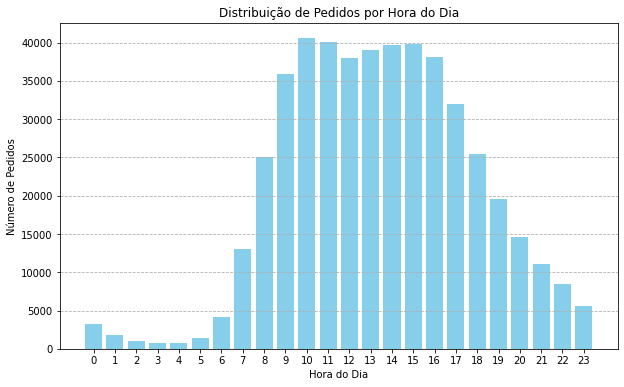

In [35]:
#Verificando a coluna 'order_hour_of_day'
invalid_hours = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]
print(f'Valores inválidos em "order_hour_of_day":\n{invalid_hours}')

# Contagem de ocorrências de cada hora do dia
hour_counts = orders['order_hour_of_day'].value_counts().sort_index()

# Plotando a distribuição de 'order_hour_of_day'
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.title('Distribuição de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(hour_counts.index)
plt.grid(axis='y', linestyle='--')
plt.show()

Valores inválidos em "order_dow":
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


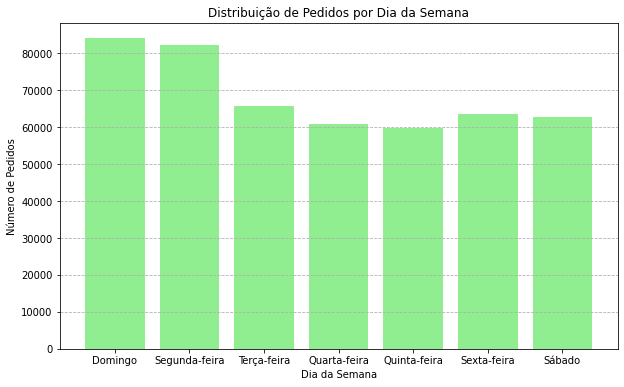

In [36]:
#Verificando a coluna 'order_dow'
invalid_dow = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]
print(f'Valores inválidos em "order_dow":\n{invalid_dow}')

# Contagem de ocorrências de cada dia da semana
dow_counts = orders['order_dow'].value_counts().sort_index()
dow_counts.index = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'] # Substituição dos números pelos nomes dos dias da semana


# Plotando a distribuição de 'order_dow'
plt.figure(figsize=(10, 6))
plt.bar(dow_counts.index, dow_counts.values, color='lightgreen')
plt.title('Distribuição de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(dow_counts.index)
plt.grid(axis='y', linestyle='--')
plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">Não foram encontrados valores inválidos nas colunas `'order_hour_of_day'` e `'order_dow'` do DataFrame `orders`. Isso significa que essas colunas estão consistentes, seguindo as expectativas de que `'order_hour_of_day'` deve variar de 0 a 23 e `'order_dow'` de 0 a 6.</i>

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

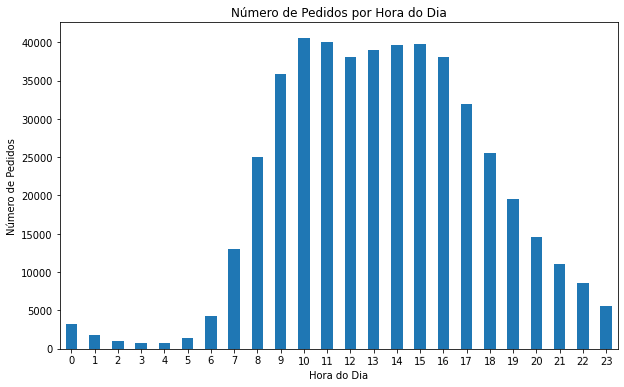

In [37]:
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index() # Calculando o número de pedidos por hora do dia

# Criando o gráfico
orders_per_hour.plot(
    x='hour',
    y='order',
    figsize=(10, 6),
    kind='bar',
    title='Número de Pedidos por Hora do Dia',
    xlabel='Hora do Dia',
    ylabel='Número de Pedidos',
    rot=1)

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">A maioria dos pedidos é feita durante o dia, com um pico notável nas horas da manhã, especialmente entre 9h e 11h. Há uma queda acentuada nas horas da madrugada, com a menor quantidade de pedidos entre 2h e 5h.</i>

### [A3] Em que dia da semana as pessoas fazem compras?

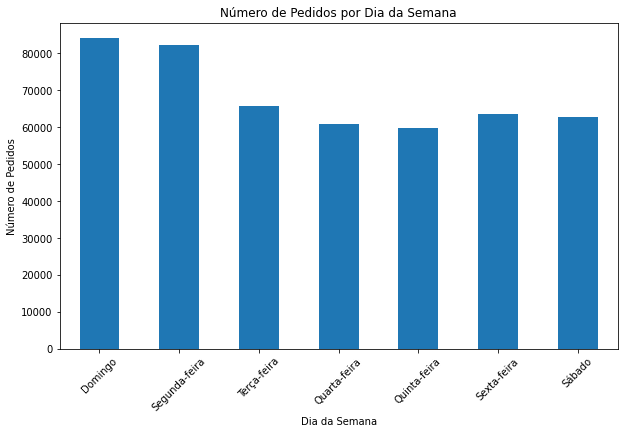

In [38]:
#Calculando o número de pedidos por dia da semana
orders_per_dow = orders['order_dow'].value_counts().sort_index()
orders_per_dow.index = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'] # Substituição dos números pelos nomes dos dias da semana

#Criando o gráfico
orders_per_dow.plot(
    x='day',
    y='order',
    kind='bar',
    figsize=(10, 6),
    title='Número de Pedidos por Dia da Semana',
    xlabel='Dia da Semana',
    ylabel='Número de Pedidos',
    rot=45)

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">Nos pedidos por dia da semana, observou-se que os dias mais movimentados são domingo e segunda-feira. Este padrão pode estar relacionado ao fato de que as pessoas tendem a fazer compras online mais frequentemente no início da semana ou no final do fim de semana. Foi substituído os valores de 0 a 6 da coluna `'order_dow'`, que referem-se aos dias da semana, por valores que indicam os dias da semana em texto, exemplo: "Domingo", dessa forma torna o gráfica com leitura mais fácil.</i>

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

<i style="color:darkblue;">A distribuição mostra que a maioria dos pedidos é feita com intervalos de 1 a 30 dias desde o último pedido, com um pico notável em 7 dias, indicando que muitos clientes fazem pedidos semanais. Pedidos com 0 dias indicam que foram feitos no mesmo dia do pedido anterior, uma quantidade baixa de pedidos, enquanto pedidos com 30 dias indicam que foram feitos aproximadamente no mesmo dia do mês anterior, um pico de pedidos. Este padrão sugere uma variedade de comportamentos de compra, com alguns clientes fazendo pedidos com frequência e outros com intervalos mais espaçados.</i>

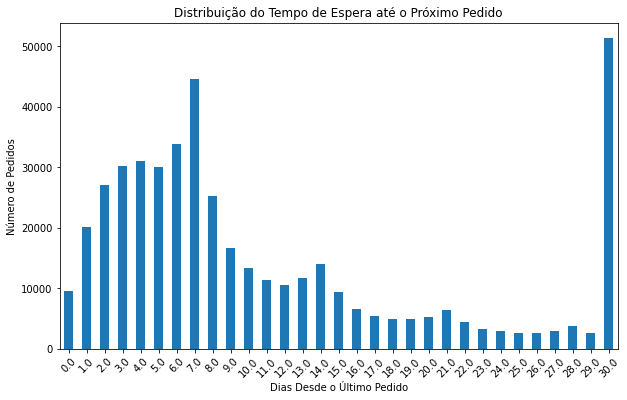

In [39]:
# Calculando o tempo médio de espera até o próximo pedido
orders_interval = orders['days_since_prior_order'].value_counts().sort_index()

#Gráfico
orders_interval.plot(
    x='days',
    y='order',
    kind='bar',
    figsize=(10, 6),
    title='Distribuição do Tempo de Espera até o Próximo Pedido',
    xlabel='Dias Desde o Último Pedido',
    ylabel='Número de Pedidos',
    rot=45)

plt.show()

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [40]:
# Filtrando dados para quartas-feiras e sábados
wednesday_orders = orders[orders['order_dow'] == 2]  # Quartas-feiras
saturday_orders = orders[orders['order_dow'] == 5]   # Sábados

In [41]:
# Calculando distribuições de order_hour_of_day
wednesday_distribution = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_distribution = saturday_orders['order_hour_of_day'].value_counts().sort_index()

In [42]:
# Criando uma única variável para ambos os dias
we_sa_distribution = pd.DataFrame({'Quartas-feiras': wednesday_distribution, 'Sábados': saturday_distribution})

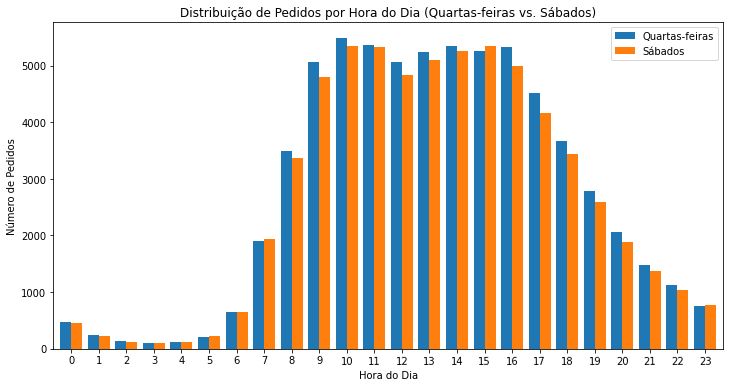

In [43]:
#Gráfico
we_sa_distribution.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8,
    title='Distribuição de Pedidos por Hora do Dia (Quartas-feiras vs. Sábados)',
    xlabel='Hora do Dia',
    ylabel='Número de Pedidos',
    rot=1)

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">As distribuições de pedidos por hora nas quartas-feiras e sábados apresentam semelhanças, com picos de atividade em torno das 10h e 11h. Quartas-feiras e sábado têm uma queda gradual após as 18h. Nas quartas, as primeiras horas do dia são mais estáveis. Essas nuances indicam padrões distintos de comportamento de compra.</i>

### [B2] Qual é a distribuição do número de pedidos por cliente?

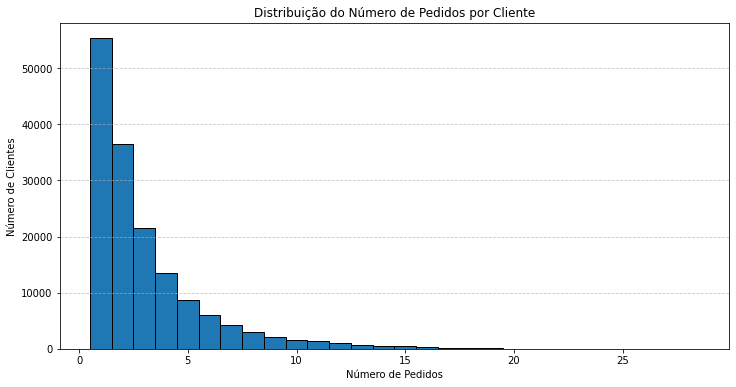

In [44]:
# Calculando o número de pedidos por cliente
orders_per_customer = orders['user_id'].value_counts().sort_values()

#Criando o gráfico
plt.figure(figsize=(12, 6))
plt.hist(orders_per_customer, bins=np.arange(1, orders_per_customer.max() + 2) - 0.5, edgecolor='black')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

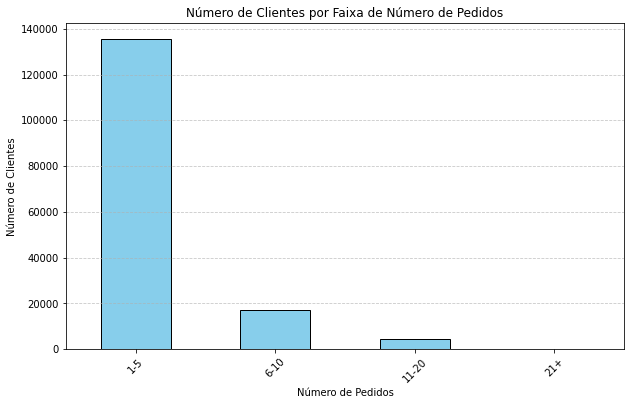

In [45]:
# Definindo as faixas de número de pedidos
bins = [0, 5, 10, 20, orders_per_customer.max()]
labels = ['1-5', '6-10', '11-20', '21+']

# Classificando os usuários nessas faixas
customer_order_ranges = pd.cut(orders_per_customer, bins, labels=labels)

# Contando quantos usuários estão em cada faixa
order_range_counts = customer_order_ranges.value_counts().sort_index()

#Criando o gráfico
plt.figure(figsize=(10, 6))
order_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Clientes por Faixa de Número de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">A maioria dos clientes fez apenas 1 ou 2 pedidos, enquanto o número de clientes diminui à medida que o número de pedidos aumenta. Isso sugere que há um pico de clientes nos primeiros pedidos e que poucos fazem mais pedidos.</i>

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [46]:
# Obtendo os 20 produtos mais populares
top_products = order_products['product_id'].value_counts().head(20)

In [47]:
# Mapeando IDs e nomes de produtos
products['product_info'] = products['product_id'].astype(str) + ' - ' + products['product_name']
product_names = products.set_index('product_id')['product_info'].to_dict()
top_products_with_names = top_products.rename(product_names)

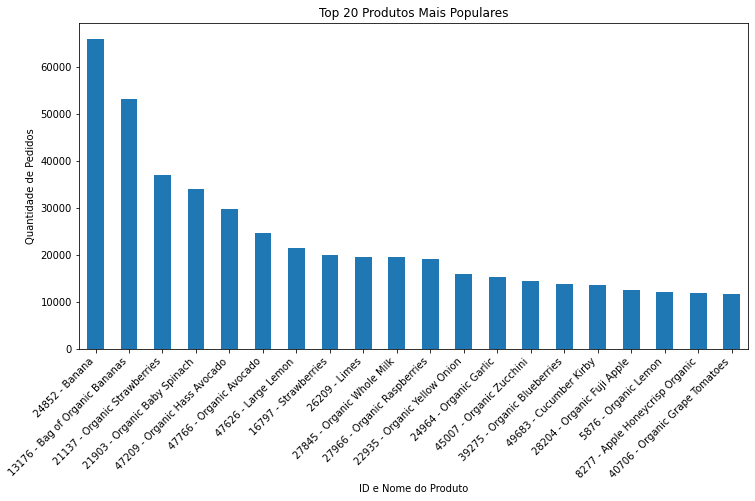

In [48]:
# Criando o gráfico
top_products_with_names.plot(
    kind='bar',
    figsize=(12, 6),
    title='Top 20 Produtos Mais Populares',
    xlabel='ID e Nome do Produto',
    ylabel='Quantidade de Pedidos')
plt.xticks(rotation=45, ha='right')

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">No gráfico acima, os produtos representam os itens mais populares entre os clientes, com as bananas e produtos orgânicos liderando em número de pedidos. Essas informações são valiosas para perceber melhor o comportamento de compra dos consumidores e orientar estratégias de estoque e promoções.</i>

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [49]:
# Quantidade de produtos distintos em cada pedido
products_per_order = order_products.groupby('order_id')['product_id'].count()

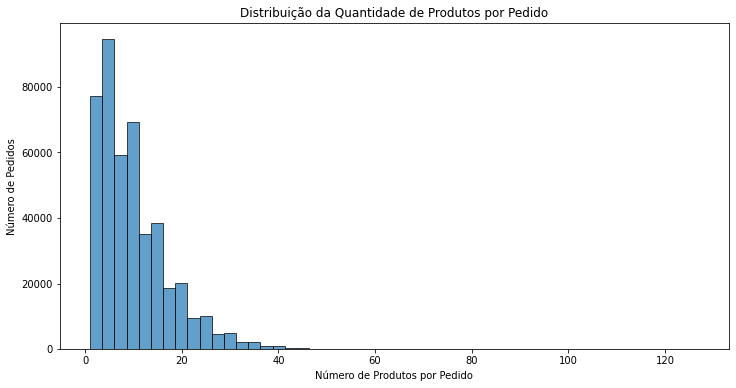

In [50]:
# Criando o gráfico
products_per_order.plot(
    kind='hist',
    bins=50,
    edgecolor='black',
    figsize=(12, 6),
    title='Distribuição da Quantidade de Produtos por Pedido',
    alpha=0.7)
plt.xlabel('Número de Produtos por Pedido')
plt.ylabel('Número de Pedidos')

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">A maioria dos clientes compra entre 1 e 15 produtos por pedido, com o pico em torno de 5 produtos. Isso sugere que os clientes geralmente fazem compras pequenas a médias. A distribuição é assimétrica à direita, indicando que pedidos maiores são menos frequentes.</i>

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [51]:
# Calculando os 20 principais itens incluídos mais frequentemente em pedidos repetidos
repeated_products = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)

In [80]:
# Juntando com a tabela de produtos para obter os IDs e nomes dos produtos e criando uma nova coluna com a informação desejada
top_repeated_products_info = pd.merge(repeated_products, products[['product_id', 'product_name']], left_index=True, right_on='product_id').sort_values(by='product_id', ascending=False)
top_repeated_products_info['product_info'] = top_repeated_products_info['product_id'].astype(str) + ' - ' + top_repeated_products_info['product_name']

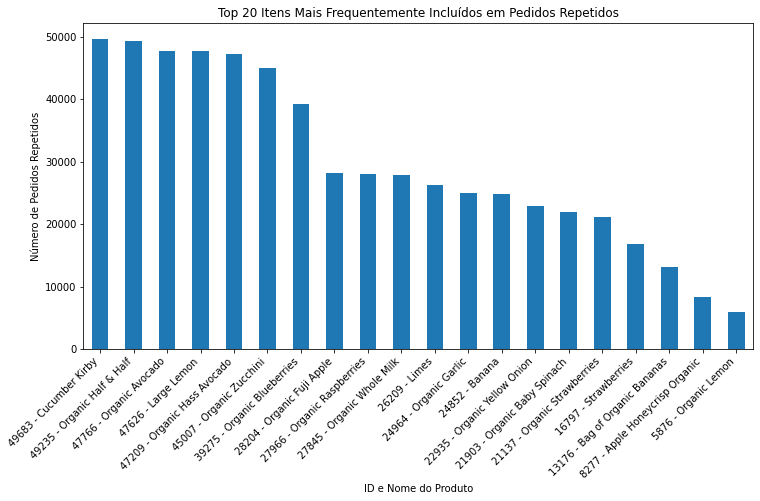

In [53]:
# Criando o gráfico
top_repeated_products_info.plot(
    kind='bar',
    x='product_info',
    y='product_id',
    legend=False,
    figsize=(12, 6),
    title='Top 20 Itens Mais Frequentemente Incluídos em Pedidos Repetidos',
    xlabel='ID e Nome do Produto',
    ylabel='Número de Pedidos Repetidos')
plt.xticks(rotation=45, ha='right')

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">Os 20 produtos mais frequentemente incluídos em pedidos repetidos revelam preferências populares, liderados por itens como `bananas`, `morangos` e `abacates`. Essas informações são cruciais para estratégias de estoque e marketing, proporcionando uma compreensão valiosa das escolhas recorrentes dos clientes.</i>

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [54]:
# Juntando 'order_products' com 'products' para obter o nome e o ID de cada produto
merged_df = pd.merge(order_products, products[['product_id', 'product_name']], on='product_id')

In [55]:
# Calculando a proporção de pedidos repetidos para cada produto
proportion_repeated = merged_df.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()

In [56]:
print(proportion_repeated)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reordered  
0       0.564286  
1       0.000000  
2       0.738095  
3       0.510204  
4       0.500000  
...          ...  
45

Escreva suas conclusões aqui

<i style="color:darkblue;">Ao agrupar os dados por departamento em vez de produtos individuais, ganhamos uma visão mais abrangente e gerenciável da proporção de pedidos repetidos. Isso facilita a interpretação, pois categorizar por departamento reduz a complexidade do gráfico, destacando tendências gerais. Além disso, departamentos representam categorias amplas, o que pode ser mais útil para análises de padrões de repetição em uma escala mais macro, proporcionando insights valiosos para estratégias de recompra e marketing.</i>

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [67]:
# Mesclar 'order_products' com 'orders' para obter 'user_id'
order_products = pd.merge(order_products, orders[['order_id', 'user_id']], on='order_id', how='left')

# Calcular a proporção de pedidos repetidos para cada cliente
repeated_order_ratio = order_products.groupby('user_id')['reordered'].mean().fillna(0)

In [68]:
print(repeated_order_ratio)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escreva suas conclusões aqui

<i style="color:darkblue;">A distribuição da proporção de pedidos repetidos por cliente mostra que a maioria dos clientes tem uma taxa baixa de repetição, indicando que a maioria faz pedidos variados. No entanto, alguns clientes têm uma alta taxa de repetição, sugerindo uma preferência consistente por certos produtos.</i>

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [74]:
# Contar a quantidade de vezes que cada produto é adicionado como primeiro ao carrinho
first_to_cart_counts = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

# Juntar com a tabela de produtos para obter IDs e nomes dos produtos
top_first_to_cart_info = pd.merge(first_to_cart_counts, products[['product_id', 'product_name']], left_index=True, right_on='product_id').sort_values(by='product_id', ascending=False)

In [75]:
print(top_first_to_cart_info)

       product_id  product_id_x  product_id_y                 product_name
49234       49235          1797         49235          Organic Half & Half
47765       47766          3044         47766              Organic Avocado
47625       47626          1737         47626                  Large Lemon
47208       47209          3390         47209         Organic Hass Avocado
44631       44632          1914         44632   Sparkling Water Grapefruit
38688       38689          1397         38689     Organic Reduced Fat Milk
27965       27966          2024         27966          Organic Raspberries
27844       27845          4363         27845           Organic Whole Milk
27085       27086          1309         27086                  Half & Half
26208       26209          1370         26209                        Limes
24851       24852         15562         24852                       Banana
22934       22935          1246         22935         Organic Yellow Onion
21902       21903        

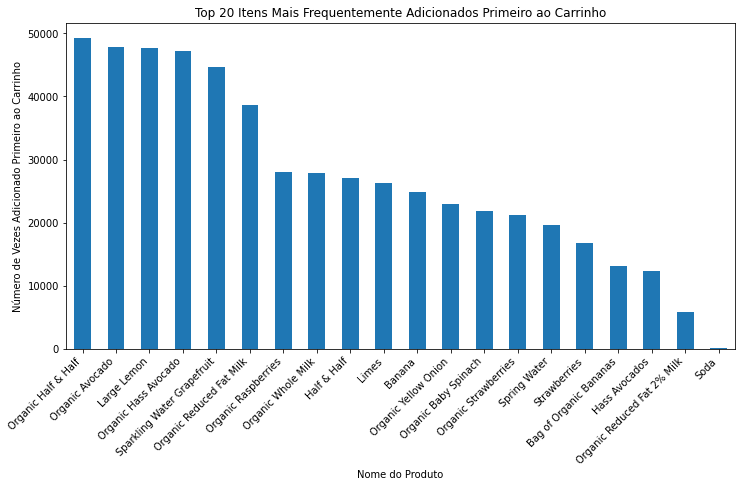

In [76]:
# Criando o gráfico
top_first_to_cart_info.plot(kind='bar', x='product_name', y='product_id', legend=False, figsize=(12, 6))
plt.title('Top 20 Itens Mais Frequentemente Adicionados Primeiro ao Carrinho')
plt.xlabel('Nome do Produto')
plt.ylabel('Número de Vezes Adicionado Primeiro ao Carrinho')
plt.xticks(rotation=45, ha='right')

plt.show()

Escreva suas conclusões aqui

<i style="color:darkblue;">Os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros incluem produtos comumente consumidos, como bananas, bagas orgânicas, leite orgânico e abacates. Bebidas, como água com gás e soda, também estão presentes. O padrão reflete preferências por produtos frescos, laticínios orgânicos e opções de bebidas, indicando escolhas saudáveis e práticas para os consumidores.</i>

# Conclusão geral do projeto:

<i style="color:darkblue;">Este projeto ofereceu uma visão abrangente do comportamento dos consumidores, padrões de compra e preferências de produtos em um supermercado online. As conclusões extraídas podem ser fundamentais para estratégias de negócios, desde a gestão de estoques até campanhas de marketing direcionadas.</i>